# Practical session 1 Unsupervised learning

Yang ZHANG

* Importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp

# 1. Datasets

## 1.3 loading the data

### 1 load and store the data and preprocessing

In [2]:
temp = np.load('temper.npz')
digits = np.load('digits.npz')

In [3]:
temp_data = temp['data']
x1 = temp_data[:,:12]
temp_villes = temp['villes']
temp_varname = temp['varname']

digits_x = digits['x']/255.
digits_xt = digits['xt']/255.
digits_y = digits['y']
digits_yt = digits['yt']

### 2 a quick look at the data, compute the mean values and visualize it

In [4]:
# look at the data
print(digits_x.shape, temp_data.shape, x1.shape)
print(x1)
print(temp_villes, temp_varname)

(3000, 784) (15, 14) (15, 12)
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]
['Bordeaux' 'Brest' 'Cle

* compute the mean values for each variable and visualize

In [5]:
# for temperture data
x1_mean = np.mean(x1, axis=0)

# for digits data
digits_mean = np.mean(digits_x, axis=0)

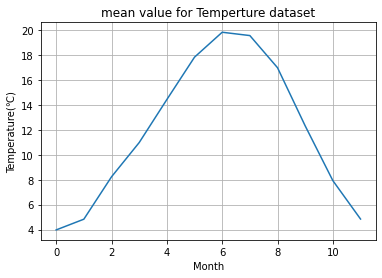

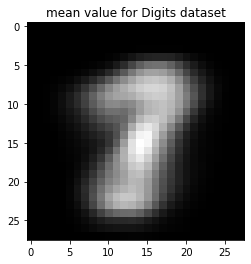

In [6]:
# plot the mean value
pl.figure()
pl.plot(x1_mean)
pl.grid()
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("mean value for Temperture dataset")
pl.show()

pl.figure()
pl.imshow(digits_mean.reshape(28, 28), cmap='gray')
pl.title("mean value for Digits dataset")
pl.show()

* The average value for temperture data is a line represents the average value for all the cities in 12 months and the average value for digits data is an image taking pixels as average of the pixel in every image.

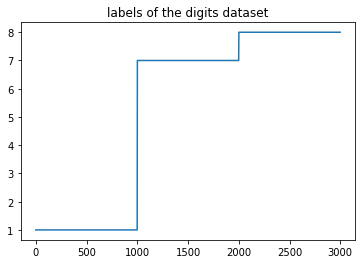

In [7]:
# plot the labels of the digits dataset
pl.figure()
pl.plot(digits_y)
pl.title("labels of the digits dataset")
pl.show()

* We should notice that the digits dataset only have 3 classes

### 3 Reproduce the Figures

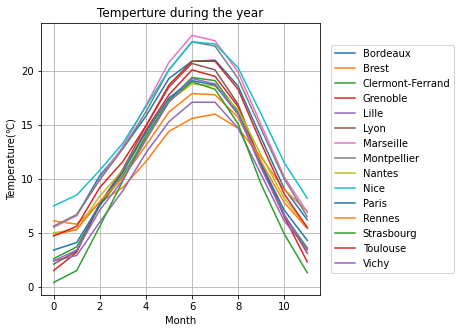

In [8]:
pl.figure(figsize=(5,5))
pl.plot(x1.T)
pl.legend(temp_villes, loc='right', bbox_to_anchor=(1.5, 0.5))
pl.grid()
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Temperture during the year")
pl.show()

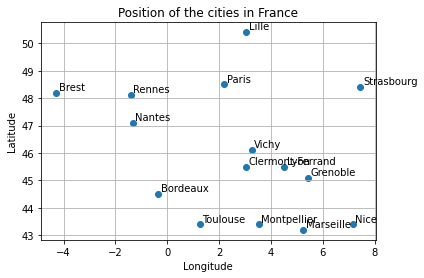

In [9]:
pl.figure()
pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

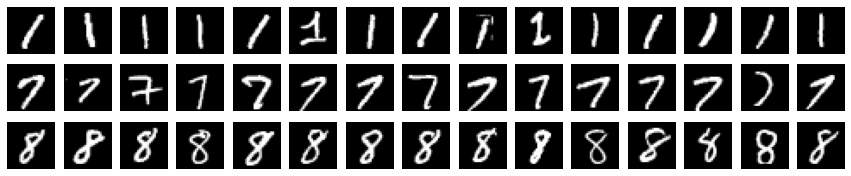

In [10]:

fig, axes = pl.subplots(3, 15, figsize=(15, 3))
for i in range(15):
  axes[0, i].imshow(digits_x[i].reshape(28, 28), cmap='gray')
  axes[0, i].axis('off')
  axes[1, i].imshow(digits_x[i+1000].reshape(28, 28), cmap='gray')
  axes[1, i].axis('off')
  axes[2, i].imshow(digits_x[i+2000].reshape(28, 28), cmap='gray')
  axes[2, i].axis('off')



# 2. clustering

## 2.1 For both datasets

### 1 Perform K-means on the data(k=3) and store the cluster centroids and estimated classes.

In [11]:
from sklearn.cluster import KMeans
### performe the K-means

## for temperture dataset
# K-means with K=3
K_temp = 3
clf = KMeans(K_temp)

# fit the model and predict classes
temp_class = clf.fit_predict(x1)

# get the centroids
temp_C = clf.cluster_centers_

## for digits dataset
# K-means with K=3
K_digits = 3
clf = KMeans(K_digits)

# fit the model and predict classes
digits_class = clf.fit_predict(digits_x)

# get the centroids
digits_C = clf.cluster_centers_

### 2 Plot the centroids and interpret

* plot the centroids of the temperture data

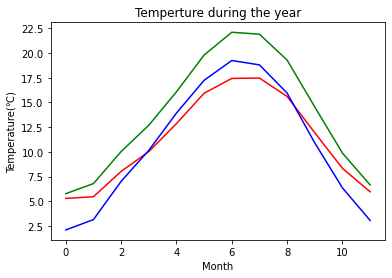

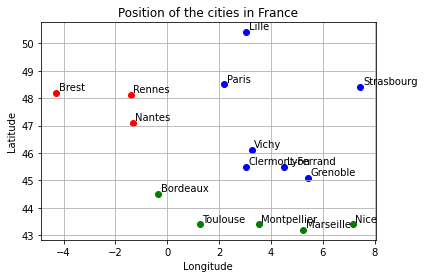

In [12]:
# plot the centroids of the temperture data
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(K_temp):
  pl.plot(temp_C[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Temperture during the year")
pl.show()

# plot the position of the cities of the temperture data
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
#pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.scatter(temp_data[i,13], temp_data[i,12], c=color_map[temp_class[i]])
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

* plot the centroid of the digits classes

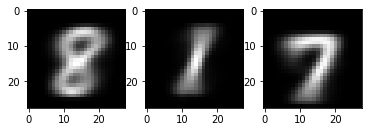

In [13]:
# plot the centroid of the digits classes
for i in range(K_digits):
  pl.subplot(1, K_digits, i+1)
  pl.imshow(digits_C[i].reshape(28, 28), cmap='gray')
pl.show()

* After the K-means cluster with K=3, for temperture dataset, the 3 centoids are the average temperture of each month of the 3 clusters, we can see that the samples are clustered by the geographical location, we can see in the scatter plot above that the cities are clustered accroding to the longitude and latitude of the city.  
For the digits dataset, the samples are classed by the classes, the centroids are the average of the images in the cluster. the centroids look like number 1, 8, 7. 

### 3 Change the K in the two previous steps

* for temperture dataset K=4

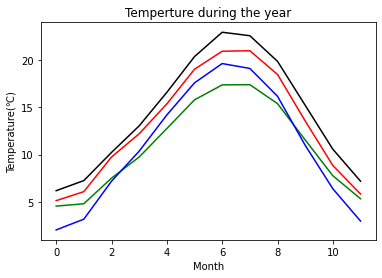

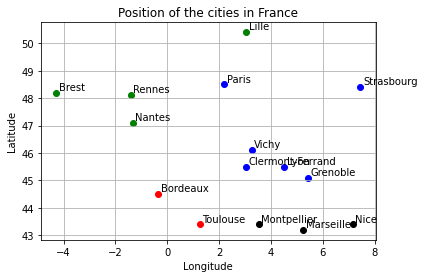

In [14]:
## for temperture dataset
# K-means with K=4
K_temp = 4
clf_test = KMeans(K_temp)

# fit the model and predict classes
temp_class_test = clf_test.fit_predict(x1)

# get the centroids
temp_C_test = clf_test.cluster_centers_

# plot the centroids of the temperture data
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(K_temp):
  pl.plot(temp_C_test[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Temperture during the year")
pl.show()

# plot the position of the cities of the temperture data
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
#pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.scatter(temp_data[i,13], temp_data[i,12], c=color_map[temp_class_test[i]])
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

* for digits dataset K=4

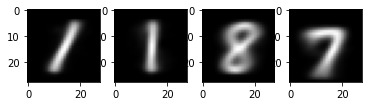

In [15]:
## for digits dataset
# K-means with K=4
K_digits = 4
clf_test = KMeans(K_digits)

# fit the model and predict classes
digits_class_test = clf_test.fit_predict(digits_x)

# get the centroids
digits_C_test = clf_test.cluster_centers_

# plot the centroid of the digits classes
for i in range(K_digits):
  pl.subplot(1, K_digits, i+1)
  pl.imshow(digits_C_test[i].reshape(28, 28), cmap='gray')
pl.show()

* for digits dataset K=2

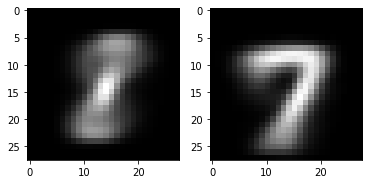

In [16]:
## for digits dataset
# K-means with K=2
K_digits = 2
clf_test = KMeans(K_digits)

# fit the model and predict classes
digits_class_test = clf_test.fit_predict(digits_x)

# get the centroids
digits_C_test = clf_test.cluster_centers_

# plot the centroid of the digits classes
for i in range(K_digits):
  pl.subplot(1, K_digits, i+1)
  pl.imshow(digits_C_test[i].reshape(28, 28), cmap='gray')
pl.show()

* After tring differnt values for K for each cases, I found the k=3 is good for both datasets, by looking at the position of the cities, k=3 gives the most robust and interpertable result, if k is less than 3, the cities are not well seperated, when k is larger than 3, the result is not robust and changes every time we run the code(because the k-means initialiaztion is random) and not correspond to our real world.   
For digits dataset, the best value is 3 because if k is different from 3, we get wrong centroid which can be strange(k<3, we have images that don't like any number) or have the same number in some centroids(k>3, we have the same number in differnt centroid).

## 2.2 Temperature dataset

### 1 Look at the name of the cities in each clusters

In [17]:
print("calss 1:", temp_villes[temp_class==0])
print("calss 2:", temp_villes[temp_class==1])
print("calss 3:", temp_villes[temp_class==2])

calss 1: ['Brest' 'Nantes' 'Rennes']
calss 2: ['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']
calss 3: ['Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy']


* When k = 3, the cities in each clusters make sens beacuse they can be well seperated by the logitude and lattitude, and they fit well in the real life.

### 2 Plot the cities and use estimated class as color

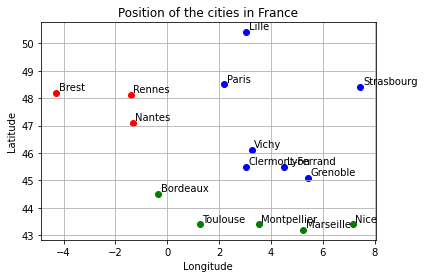

In [18]:
# plot the cities

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
#pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.scatter(temp_data[i,13], temp_data[i,12], c=color_map[temp_class[i]])
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

* Yes, the K-means clustering recover a geographical similarity between the cities, we can see the longitude and latitude are very similar, this is because when using k-means, it cluster the temperture into 3 classes, and the temperture is related to the geographical location of the city, so in the scatter plot, there should be a geographical similarity between 3 class.

## 2.3 Digits dataset

### 1 Does the clusters remsemble a true image and if a cluster centroid is a true image?

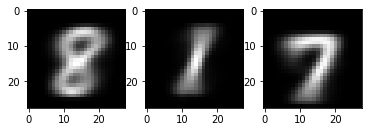

In [19]:
# plot the centroid of the digits classes
for i in range(3):
  pl.subplot(1, 3, i+1)
  pl.imshow(digits_C[i].reshape(28, 28), cmap='gray')
pl.show()

* We can see the centroids before as k = 3, and they look very similar to a true image of the dataset, but the cluster centroid is not a true image, because it is an average value of each pixels in each clusters.

### 2 Plot the predicted labels

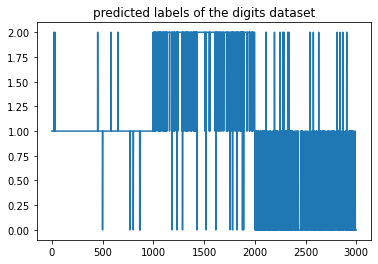

In [20]:
# plot the predicted labels
# K-means with K=3
pl.figure()
pl.plot(digits_class)
pl.title("predicted labels of the digits dataset")
pl.show()


* This is not the case, we can see the labels jump a lot, there are wrong values for some samples and it makes the signal very strange. This is because k-means make some wrong predictions. In general, the first part of the signal is mostly 0 and in the middle mostly 1 and in the later mostly 2, this is exactly the 3 calsses.

### 3 Compute the quality of the clustering using the ground truth labels

In [21]:
# compute the quality of the clustering
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
score = rand_score(digits_y.reshape(-1), digits_class)
score_a = adjusted_rand_score(digits_y.reshape(-1), digits_class)
print("score when k = 3: ", score, score_a)

score when k = 3:  0.8808293875736356 0.7337193402048142


### 4 See the effect of the parameter K

In [22]:
# see the effect of the parameter K
K_digits = 2
clf_k = KMeans(K_digits)
digits_class_k = clf_k.fit_predict(digits_x)
score_k = rand_score(digits_y.reshape(-1), digits_class_k)
score_a_k = adjusted_rand_score(digits_y.reshape(-1), digits_class_k)
print("score when k = 2: ", score_k, score_a_k)

K_digits = 4
clf_k = KMeans(K_digits)
digits_class_k = clf_k.fit_predict(digits_x)
score_k = rand_score(digits_y.reshape(-1), digits_class_k)
score_a_k = adjusted_rand_score(digits_y.reshape(-1), digits_class_k)
print("score when k = 4: ", score_k, score_a_k)

K_digits = 5
clf_k = KMeans(K_digits)
digits_class_k = clf_k.fit_predict(digits_x)
score_k = rand_score(digits_y.reshape(-1), digits_class_k)
score_a_k = adjusted_rand_score(digits_y.reshape(-1), digits_class_k)
print("score when k = 5: ", score_k, score_a_k)

score when k = 2:  0.697245081693898 0.420896217650862
score when k = 4:  0.8661533844614872 0.6810980300836428
score when k = 5:  0.8262887629209736 0.5698283118784505


* The K = 3 gives the best score, we can see that when k is different from 3, the both scores decrease, this is because we only have 3 classes in the dataset which are 1, 7, 8 so 3 clusters should have the best score among other value of k.

# 3. Density estimation

## 3.1 For both datasets

### For the tempertrue dataset

#### 1 Estimate a GMM on the data with K=2

In [23]:
# estimate a GMM for teperature
from sklearn.mixture import GaussianMixture

# create and fit the model
clf = GaussianMixture(2, covariance_type='diag')
clf.fit(x1)

# get estimated parameters
mus = clf.means_


#### 2. plot the centers of the Gaussian distributions in the mixture and interpret them

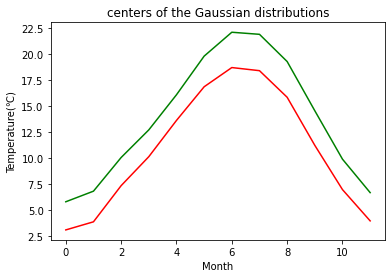

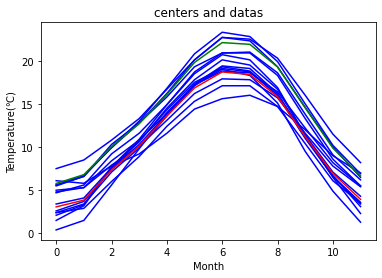

In [24]:
# plot the centers of the Gaussian distributions in the mixture
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(2):
  pl.plot(mus[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("centers of the Gaussian distributions")
pl.show()

pl.figure()

pl.plot(x1.T, c='b')
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(2):
  pl.plot(mus[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("centers and datas")
pl.show()

* By plotting the centers of the gaussian distributions in the mixture, when k=2 we get the red and green line, they are the mean value of the two gaussian distribution estimated by the GMM model, we are asuuming that the data is generated by the two gaussian model, as it is shown in the plot below, the datas(bleu line) is around the two mean value of the gaussian distribution(red and green line).

#### 3 Change the value of K and repeat the two previous steps, change the shape of the covariance

* change the value of K

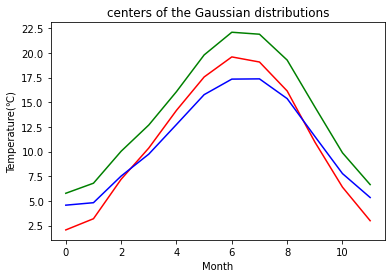

In [25]:
### change the value of K

# create and fit the model
clf_t = GaussianMixture(3, covariance_type='diag')
clf_t.fit(x1)
# get estimated parameters
mus_t = clf_t.means_

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(3):
  pl.plot(mus_t[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("centers of the Gaussian distributions")
pl.show()

* I think k=3 is the good value for tempreture dataset, we can see the centers are very similar to the result of k-means when k=3. and we have seen before that when k=3 in k-means, the cities are well clustered by their geographical position, so in this case, k=3 might be a good value, the centers are well seperated, if we increase further the k, the centers will be very close to each other means the k is too large.

* change the shape of the covariance

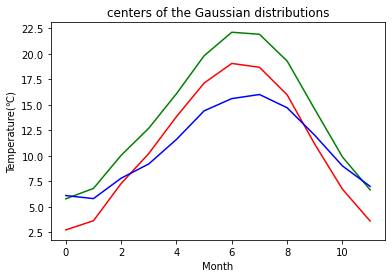

In [26]:
### change the shape of the covariance

# create and fit the model
clf_t = GaussianMixture(3, covariance_type='full')
clf_t.fit(x1)
# get estimated parameters
mus_t = clf_t.means_

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(3):
  pl.plot(mus_t[i], c=color_map[i])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("centers of the Gaussian distributions")
pl.show()

* When we use convariance type = full, the centers are more similar to the k-means result, it seems more better than diag convariance, but we don't have the true model, so it is hard to decide which is good.

#### 4 Compute the log probability of the samples, recover the samples with the samllest score and plot

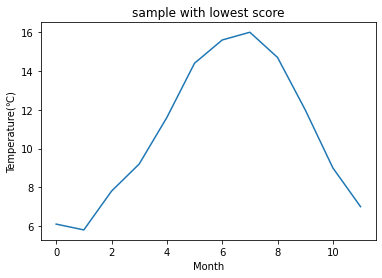

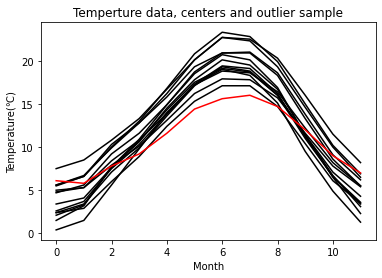

In [27]:
### compute the log probability of the samples
p = clf.score_samples(x1)

# recover the sample with smallest probability and plot
n_sample = np.argmin(p)

pl.figure()
pl.plot(x1[n_sample])
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("sample with lowest score")
pl.show()


pl.figure()
for i in range(15):
  if i != n_sample:
    pl.plot(x1[i], c='black')
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
pl.plot(x1[n_sample], c='r')
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Temperture data, centers and outlier sample")
pl.show()

* we can see the sample with lowest probability has a very strange shape, in the plot below, it is shown as the red line. Among the other samples, the red sample is quite different, it decreases at month 1, and has the most small value in the middle.

### For digits dataset

#### 1 Estimate a GMM on the data with K=3

In [28]:
# estimate a GMM for digits
# create and fit the model
clf = GaussianMixture(3, covariance_type='diag')
clf.fit(digits_x)

# get estimated parameters 
mus = clf.means_



#### 2. plot the centers of the Gaussian distributions in the mixture and interpret them

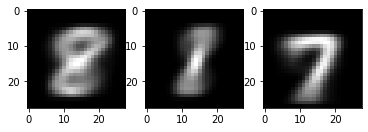

In [29]:
# plot the centers of the Gaussian distributions in the mixture
for i in range(3):
  pl.subplot(1, 3, i+1)
  pl.imshow(mus[i].reshape(28, 28), cmap='gray')
pl.show()

* We can see the centers of the Gaussian distributions are also the mean value of each model, it looks like the centroids of the k-means method. And since we just have 3 calsses: 1, 7, 8 the centers are just mean value of number 1, 7, 8.

#### 3 Change the value of K and repeat the two previous steps, change the shape of the covariance

* change the value of K

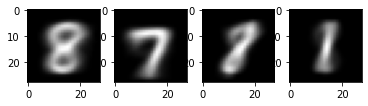

In [30]:
### change the value of K

# create and fit the model
clf_t = GaussianMixture(4, covariance_type='diag')
clf_t.fit(digits_x)
# get estimated parameters
mus_t = clf_t.means_

for i in range(4):
  pl.subplot(1, 4, i+1)
  pl.imshow(mus_t[i].reshape(28, 28), cmap='gray')
pl.show()

* As we can see when k=4, we get centers that are not similar to any digits, this is just the same in k-means, so the optimal value for k is 3, and in reality we have just 3 calsses in the dataset, we should have 3 gaussain models.

* change the shape of the variance

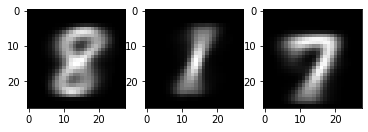

In [31]:
### change the shape of the variance

# create and fit the model
clf_t = GaussianMixture(3, covariance_type='full')
clf_t.fit(digits_x)
# get estimated parameters
mus_t = clf_t.means_

for i in range(3):
  pl.subplot(1, 3, i+1)
  pl.imshow(mus_t[i].reshape(28, 28), cmap='gray')
pl.show()

* change teh shape of covariance matrix doesn't change a lot the centers of the distribution, so it might have less influence.

#### 4 Compute the log probability of the samples, recover the samples with the samllest score and plot

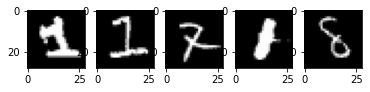

In [32]:
# compute the log probability of the samples
p = clf.score_samples(digits_x)

# recover the sample with 5 smallest probability and plot
tmp = list(map(list, zip(range(len(p)), p)))

small = sorted(tmp, key=lambda x:x[1],reverse=False)

# plot
for i in range(5):
  n_sample = small[i][0]
  pl.subplot(1, 5, i+1)
  pl.imshow(digits_x[n_sample].reshape(28, 28), cmap='gray')
pl.show()

* By showing the 5 digits with smallest probability, we can see they are very hard to be classified. So they are the ouliers of the dataset.

#### 5 Estimate the labels of the samples and compute the rand score

In [33]:
# estimate the labels of the samples
yc = clf.predict(digits_x)

score = rand_score(digits_y.reshape(-1), yc)
print("score when k = 3: ", score)

score when k = 3:  0.7613113259975547


* As we can see, the score is worse than k-means, this is probably because the distribution of the dataset is not Gaussian, so using Gaussian model is not correct, and since we only have 3 calsses, and the dataset is quite simple, k-means can give a better score.

### 6 Generate samples from the distribution and plot them

* for digits dataset

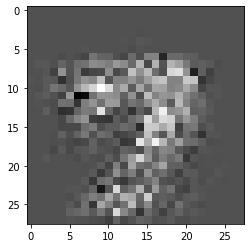

In [34]:
### generate samples from the distribution and plot
# for digits dataset
Xg = clf.sample(1)

Xg_array = np.array(Xg[0])
Xg_a = Xg_array.reshape(-1)

pl.figure()
pl.imshow(Xg_a.reshape(28, 28), cmap='gray')
pl.show()

* We can see that generated sample is quite different from an real image in the digits dataset.

* for temperture dataset(k=2)

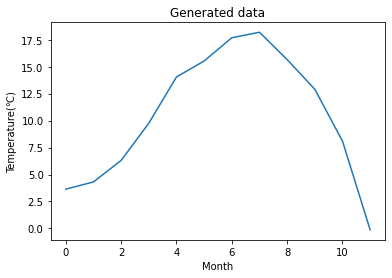

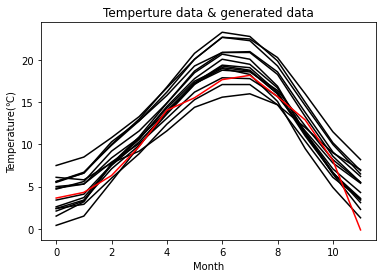

In [35]:
# for temperture dataset
# create and fit the model
clf = GaussianMixture(2, covariance_type='diag')
clf.fit(x1)

Xg = clf.sample(1)
Xg_array = np.array(Xg[0])
Xg_a = Xg_array.reshape(-1)

pl.figure()
pl.plot(Xg_a)
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Generated data")
pl.show()

pl.figure()
pl.plot(x1.T, c='black')
pl.plot(Xg_a, c='r')
pl.xlabel("Month")
pl.ylabel("Temperature(℃)")
pl.title("Temperture data & generated data")
pl.show()

* We can see that in temperture dataset, the generated data looks like a real data, is hard to tell the difference, but in some time, the generated data would have some peaks in the middle, which is not like a real data.

# 4. Dimensionality reduction

## 4.1 Linear projection: principal component analysis

### 1 Compute the covariance matrix of the data and plot it as an image

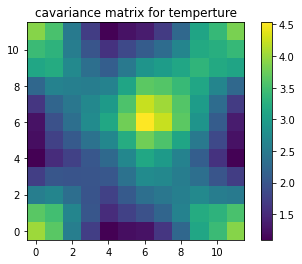

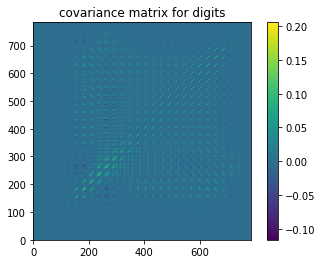

In [36]:
# compute the covariance matrix for temperture dataset
temp_cov = np.cov(x1.T)

# plot the matrix
pl.figure()
pl.imshow(temp_cov, origin='lower')
pl.title('cavariance matrix for temperture')
pl.colorbar()
pl.show()

# compute the covariance matrix for digits dataset
digits_cov = np.cov(digits_x.T)

# plot the matrix
pl.figure()
pl.imshow(digits_cov, origin='lower')
pl.title('covariance matrix for digits')
pl.colorbar()
pl.show()

* For the temperture dataset, the covariance matrix has high value on the diagonal, especially in the middle and the both edges, this means that the variance of the data in the summer and winter is high which is true in the plot we seen before. But the variance of the temperture in month 2-4 is relatively small.  And there is a strong correlation between month 12 and 1, this is beacause they are close but the index in the feature is not.  
For the digit dataset, the features are the pixels, the pixels 0-100 don't have correlation with any pixels because they are black, and the other pixels only correlate with itself and a few pixels, because the pixels that are far away is independent from each other.

### For temperture dataset

#### 2 Compute the PCA and recover the explained variance ratio, plot it and discuss

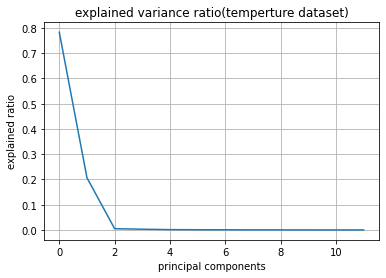

explained ratio when p=2: 0.7934301014753451


In [37]:
from sklearn.decomposition import PCA

# compute the PCA for temperture dataset
clf = PCA(n_components=None)

# fit the model
clf.fit(x1)

# get the explained variance ratio
r = clf.explained_variance_ratio_

# plot
pl.figure()
pl.plot(r)
pl.xlabel("principal components")
pl.ylabel("explained ratio")
pl.title("explained variance ratio(temperture dataset)")
pl.grid()
pl.show()

print("explained ratio when p=2:", 1 - r[1])

* Discussion: When we only have 2 principle componets, 79% of the information is perserved, so we can reduce the dimension of the dataset from 12 to 2 while perserving most of its information, this is also because the dataset is not very complex and the original feature space is just 12 dimensions.

#### 3 Project the samples in p=2 dimensions and plot the projected samples, plot the name of the city.

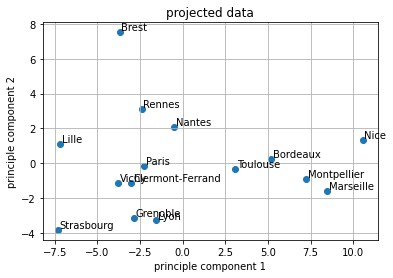

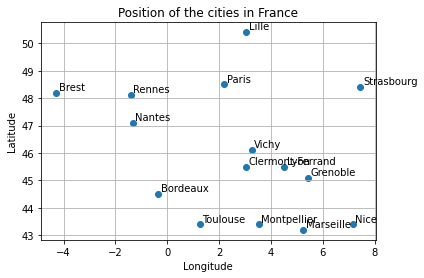

In [38]:
### project the smaples in p=2 and plot
# compute the PCA for temperture dataset
clf = PCA(n_components=2)

# fit the model
clf.fit(x1)
Xp = clf.transform(x1)
# plot
pl.figure()
pl.scatter(Xp[:,0], Xp[:,1])
for i in range(15):

  pl.text(Xp[i][0]+0.1, Xp[i][1]+0.1, temp_villes[i])

pl.xlabel("principle component 1")
pl.ylabel("principle component 2")
pl.title("projected data")
pl.grid()
pl.show()

pl.figure()
pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

* As it's shown in the pic, when p=2, I think the geographical information is well preserved, the cities (Brest, Rennes, Nantes) who's principle components are in (-7.5,0) * (2,8) is in the top left of the position plot, and samples who's principle components are in (2.5, 12) * (-2, 2) is in the bottom of the position plot, and samples who's principle components are in (-7.5, 0) * (-4,2) is in the top right of the positon plot .

#### 4 Get the two first principal directions from the model

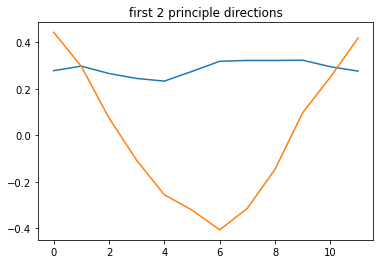

In [39]:
### get the two first two directions
D = clf.components_

# plot
pl.figure()
pl.plot(D.T)
pl.title('first 2 principle directions')
pl.show()

* The first two principle directions are the directions where the data has the most variance

#### 5 Reconstruct the data from the projected samples for different subspace dimension p

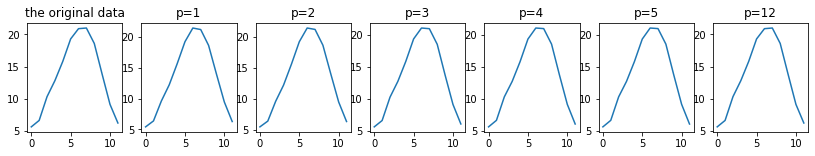

In [40]:
### reconstruct the data and compare with the true data
p_value = [1,2,3,4,5,12]
# plot original data
pl.figure(figsize=(14,2))
pl.subplot(1,7,1)
pl.plot(x1[0])
pl.title('the original data')
for i in range(len(p_value)):
  p = p_value[i]
  clf = PCA(n_components=p)

  # fit the model
  clf.fit(x1)
  Xp = clf.transform(x1)
  # inverse transform
  Xr = clf.inverse_transform(Xp)
  # plot the reconstructed data
  pl.subplot(1,7,i+2)
  pl.plot(Xr[0])
  pl.title('p={}'.format(p))

pl.show()


* We can see that for the temperture dataset, the reconstructed data is still recognizable, and since it's very simple, p=3 can give us almost perfect reconstruction, p=1 gives 80% of the explianed variance, so the reconstructed data changes very little when p changes, and when p=dimension of the featrues, we got the perfect reconstruction.

### For digits dataset

#### 2 Compute the PCA and recover the explained variance ratio, plot it and discuss

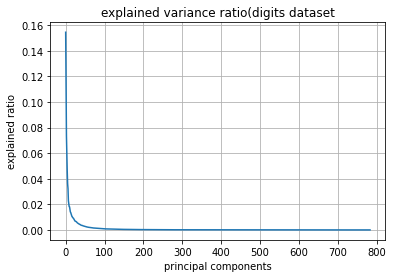

explained ratio when p=2: 0.8850240991171944


In [41]:
# compute the PCA for digits dataset
clf = PCA(n_components=None)

# fit the model
Xp = clf.fit(digits_x)

# get the explained variance ratio
r = clf.explained_variance_ratio_

# plot
pl.figure()
pl.plot(r)
pl.xlabel("principal components")
pl.ylabel("explained ratio")
pl.title("explained variance ratio(digits dataset")
pl.grid()
pl.show()

print("explained ratio when p=2:", 1 - r[1])

* We can see that when we only use 2 principle components, 89% of the information is preserved, this is quite good because we have 784 of the dimension in the original feature sapce, this result shows that the most of the features are rebundent, then we can project the data into 2 dimensional space while having a good representation of the data.

#### 3 Project the samples in p=2 dimensions and plot the projected samples, plot the name of the city.

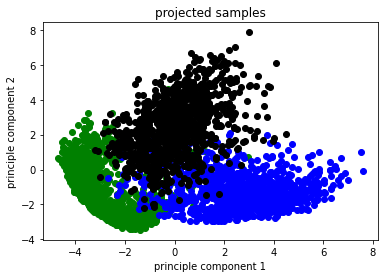

In [42]:
### project the smaples in p=2 and plot
# compute the PCA for temperture dataset
clf = PCA(n_components=2)

# fit the model
clf.fit(digits_x)
Xp = clf.transform(digits_x)

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(len(digits_x)):
  ind = digits_y[i]%5
  ind = ind[0]
  pl.scatter(Xp[i][0], Xp[i][1], c=color_map[ind])
pl.xlabel('principle component 1')
pl.ylabel('principle component 2')
pl.title('projected samples')
pl.show()

* I think when p=2, the 2 pixels that are most important for classify number1, 7, 8 are preserved as the principle components. And it is correlated to the true class of the digits datatset.

#### 4 Get the two first principal directions from the model

In [43]:
### get the two first two directions
D = clf.components_

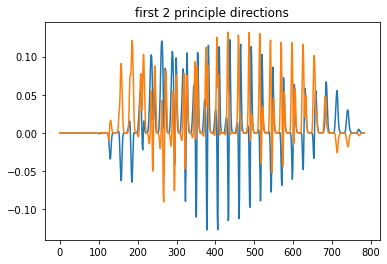

In [44]:
# plot
pl.figure()
pl.plot(D.T)
pl.title('first 2 principle directions')
pl.show()

* The first two principle directions are the directions where the data has the most variance

#### 5 Reconstruct the data from the projected samples for different subspace dimension p

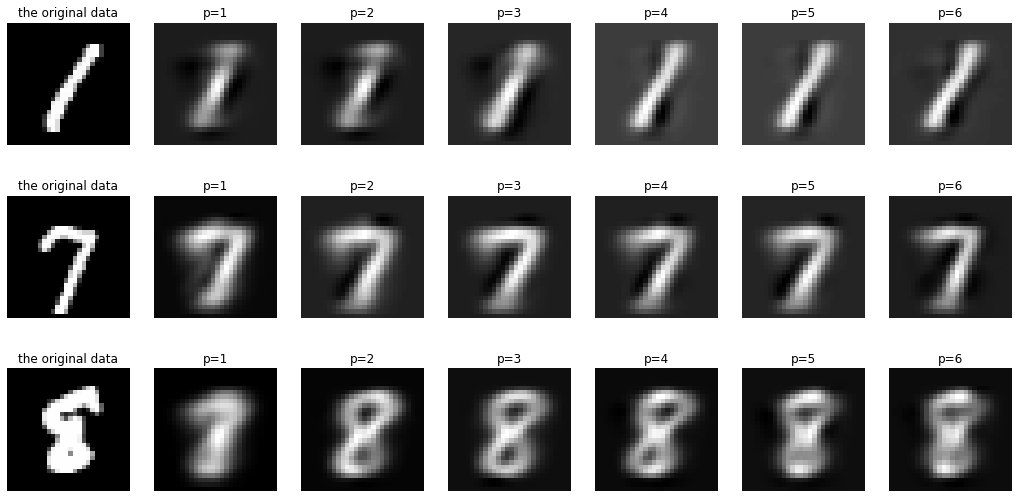

In [45]:
### reconstruct the data and compare with the true data
p_value = [1,2,3,4,5,6]
# plot original data
pl.figure(figsize=(18,9))
pl.subplot(3,7,1)
pl.imshow(digits_x[0].reshape(28,28), cmap='gray')
pl.axis('off')
pl.title('the original data')
pl.subplot(3,7,8)
pl.imshow(digits_x[1500].reshape(28,28), cmap='gray')
pl.axis('off')
pl.title('the original data')
pl.subplot(3,7,15)
pl.imshow(digits_x[2800].reshape(28,28), cmap='gray')
pl.axis('off')
pl.title('the original data')
for i in range(len(p_value)):
  p = p_value[i]
  clf = PCA(n_components=p)

  # fit the model
  clf.fit(digits_x)
  Xp = clf.transform(digits_x)
  # inverse transform
  Xr = clf.inverse_transform(Xp)
  # plot the reconstructed data
  pl.subplot(3,7,i+2)
  pl.imshow(Xr[0].reshape(28,28), cmap='gray')
  pl.axis('off')
  pl.title('p={}'.format(p))
  pl.subplot(3,7,i+9)
  pl.imshow(Xr[1500].reshape(28,28), cmap='gray')
  pl.axis('off')
  pl.title('p={}'.format(p))
  pl.subplot(3,7,i+16)
  pl.imshow(Xr[2800].reshape(28,28), cmap='gray')
  pl.axis('off')
  pl.title('p={}'.format(p))

pl.show()

* We can see that when p too small, the number 8 is hard to recognize when p=1, but since p is larger than 2, most information is preserved, the samples are recognizable, and the larger the p, the more clear the sample is.

### 6 Estimate and visualize a NMF modeling method,

* for temperture dataset compute the NMF on both dataset

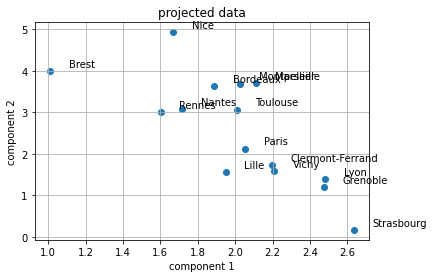

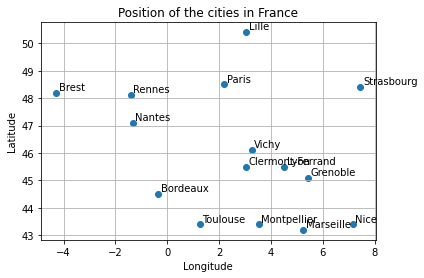

In [46]:
### compute the NMF on both dataset
from sklearn.decomposition import NMF
# temperture dataset
clf = NMF(n_components=2, init='random', random_state=0)

# fit the model
Xp = clf.fit_transform(x1)

# plot
pl.figure()
pl.scatter(Xp[:, 0], Xp[:, 1])
for i in range(15):
  pl.text(Xp[i][0]+0.1, Xp[i][1]+0.1, temp_villes[i])

pl.xlabel("component 1")
pl.ylabel("component 2")
pl.title("projected data")
pl.grid()
pl.show()

pl.figure()
pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

 * I think the NMF performs worse than PCA, beacuse we can see that the cities are not clearly clustered as a group accroding to their geographical position

* reconstruct data

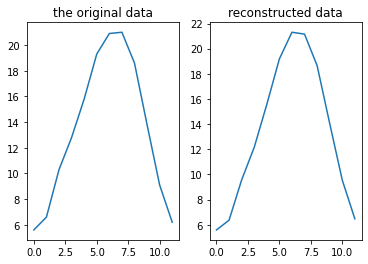

In [47]:
# reconstruct data
Xr = clf.inverse_transform(Xp)
pl.figure()
pl.subplot(1,2,1)
pl.plot(x1[0])
pl.title('the original data')
# plot the reconstructed data
pl.subplot(1,2,2)
pl.plot(Xr[0])
pl.title('reconstructed data')
pl.show()

* this result is very similar to the PCA method, when p=2, NMF can also well reconstruct data from the projected samples.

* For digits dataset compute the NMF on both dataset

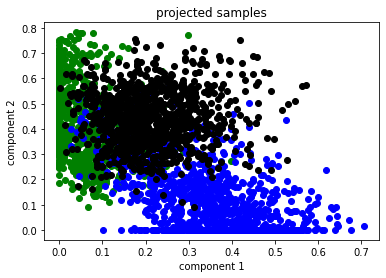

In [48]:
# digits dataset
clf = NMF(n_components=2, init='random', random_state=0)

# fit the model
Xp = clf.fit_transform(digits_x)

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(len(digits_x)):
  ind = digits_y[i]%5
  ind = ind[0]
  pl.scatter(Xp[i][0], Xp[i][1], c=color_map[ind])
pl.xlabel('component 1')
pl.ylabel('component 2')
pl.title('projected samples')
pl.show()

* Again, the result is worse than PCA, because there are many overlapping between the groups, they are not well seperated.

* reconstruct data

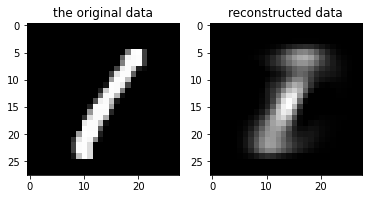

In [49]:
# reconstruct data
Xr = clf.inverse_transform(Xp)

# plot original data
pl.figure()
pl.subplot(1,2,1)
pl.imshow(digits_x[0].reshape(28,28), cmap='gray')
pl.title('the original data')

pl.subplot(1,2,2)
pl.imshow(Xr[0].reshape(28,28), cmap='gray')
pl.title('reconstructed data')
pl.show()

* This reconstructing result is also very similar to the PCA method.

## 4.2 Manifold Learning: TSNE

### for tempreture dataset

* compute the TSNE embedding of the data for p=2

In [50]:
### compute the TSNE embedding of the data for p=2 for both dataset
from sklearn.manifold import TSNE
# for tempreture dataset
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(x1)


* project samples and plot them

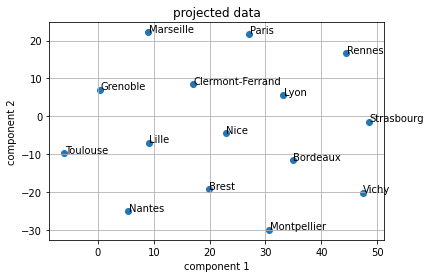

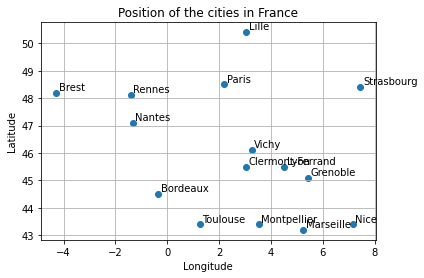

In [51]:
### project samples and plot them
# plot
pl.figure()

pl.scatter(X_embedded[:, 0], X_embedded[:, 1])
for i in range(15):

  pl.text(X_embedded[i][0]+0.1, X_embedded[i][1]+0.1, temp_villes[i])

pl.xlabel("component 1")
pl.ylabel("component 2")
pl.title("projected data")
pl.grid()
pl.show()

pl.figure()
pl.scatter(temp_data[:,13], temp_data[:,12])
for i in range(15):
  pl.annotate(temp_villes[i], (temp_data[i,13], temp_data[i,12]), xytext=(temp_data[i,13]+0.1, temp_data[i,12]+0.1))
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")
pl.show()

* The projected data is almost evenly seperated since we use perplexity = 50.

* change the value of perplexity

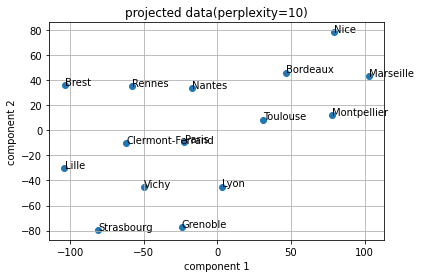

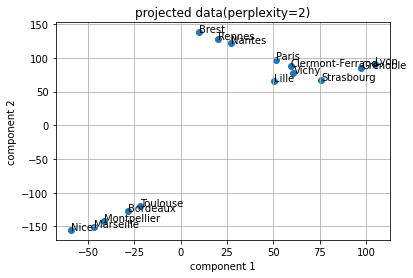

In [52]:
### change the value of perplexity
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(x1)

### project samples and plot them
# plot
pl.figure()


pl.scatter(X_embedded[:, 0], X_embedded[:, 1])
for i in range(15):
  pl.text(X_embedded[i][0]+0.1, X_embedded[i][1]+0.1, temp_villes[i])

pl.xlabel("component 1")
pl.ylabel("component 2")
pl.title("projected data(perplexity=10)")
pl.grid()
pl.show()

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2).fit_transform(x1)

### project samples and plot them
# plot
pl.figure()
pl.scatter(X_embedded[:, 0], X_embedded[:, 1])
for i in range(15):

  pl.text(X_embedded[i][0]+0.1, X_embedded[i][1]+0.1, temp_villes[i])

pl.xlabel("component 1")
pl.ylabel("component 2")
pl.title("projected data(perplexity=2)")
pl.grid()
pl.show()

* The perplexity affect the density or how close the samples are in a group. If the value is too big, then the samples are all equally distributed in the plot, if the value is suitable(2 in this case), then the embedding recover very well the relations for the temperture dataset, the cities are very well grouped acroding to their position, and this is better than PCA.

### For digits dataset

* compute the TSNE embedding of the data for p=2

In [53]:
# for digits dataset
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(digits_x)


* project samples and plot them

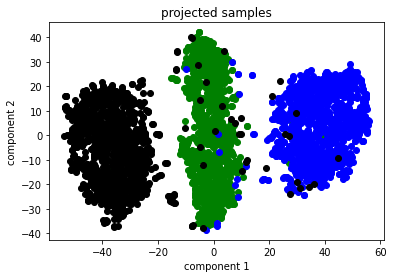

In [54]:
### project samples and plot them

pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(len(digits_x)):
  ind = digits_y[i]%5
  ind = ind[0]
  pl.scatter(X_embedded[i][0], X_embedded[i][1], c=color_map[ind])
pl.xlabel('component 1')
pl.ylabel('component 2')
pl.title('projected samples')
pl.show()

* I can say that we get a very good result, most of the samples are clustered to one group, with a few wrongly grouped.

* change the value of perplexity

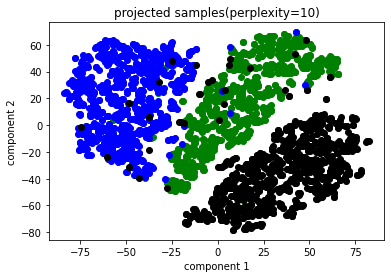

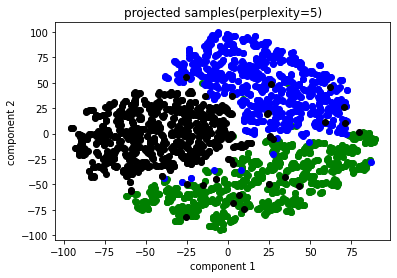

In [55]:
### change the value of perplexity
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(digits_x)

### project samples and plot them
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(len(digits_x)):
  ind = digits_y[i]%5
  ind = ind[0]
  pl.scatter(X_embedded[i][0], X_embedded[i][1], c=color_map[ind])
pl.xlabel('component 1')
pl.ylabel('component 2')
pl.title('projected samples(perplexity=10)')
pl.show()

### change the value of perplexity
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(digits_x)

### project samples and plot them
pl.figure()
color_map = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
for i in range(len(digits_x)):
  ind = digits_y[i]%5
  ind = ind[0]
  pl.scatter(X_embedded[i][0], X_embedded[i][1], c=color_map[ind])
pl.xlabel('component 1')
pl.ylabel('component 2')
pl.title('projected samples(perplexity=5)')
pl.show()

* When changing the perplexity, if it's too small, the smaples won't be well seperated, but when it's large(>10), the projected data is well gouped. And the embedding is more discriminant than before in 2D.

# Discussion

* This session is about unsupervised learning and we tried clustering using K-means, Density estimation using GMM and Dimensionality reduction using PCA and TSNE.  It is very helpful to implement each method so I can deeply understand how they works and the effect on the dataset by visualising them. By looking at the mathmatical formulars of each method is hard to understand how they work, and doing the lab is a very well practice of what we learned in the class, I can combine the result of each method and the course we seen to make connections between the real life implementation and the theory behind them. 
* It is not so hard for most of the questions if I look at the course and library documents, but it's hard to determine the best cluster number for the temperture dataset both for K-means and GMM, I think k=3 or 4 both make sence by looking at the position of each city, but since we only have small number of data and the temperture in real life is hard to group so I think this is normal. This is indeed the problem of K-means because we have to determine the k by ourself, instead the digits dataset gives a very good performence since we know the number of clusters.  
And it's also hard for me to tell hy the GMM clustering score is worse than K-means, I think it's the true distribution of the dataset or the Gaussian assumption doesn't fit the dataset.  
The other problem which I don't understand is how to plot the first two principal directions from the model when using PCA, for example, the tempertrue data has 12 dimensions, so the principle direction also has 12 dimensions, it's impossiple to plot this direction, and the impact of moving along those direction is unsure.  
* What I should improve is the visualization skills, it took me a long time to search how to do all kinds of plot and images, how to make the code efficient, I need to continue work on that, and I need to do more practice on each model to see the influence of all the parameters since there are many, like the covariance_type in GMM.  
* For the professional setting, I think these tools are very frequntly used to deal with many types of dataset, like PCA is a very useful tool to do the dimensionality reduction which would be the preprocessing for many other method, when we have some dataset like in finance or weather department, we can predict price or temperture or do comsumer classification in the market.
